# The Sparks Foundation - Graduate Rotational Internship Program (2020)
## Task - 2 : Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [21]:
# Importing the libraries: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Reading the data 

In [22]:
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<b>What is the data about? </b><br>
We have with us a dataset containing the number of hours studied by a student and the corresponding score that student got in his/her exams. The scores are in percentage values. <br>
We want to see if there is a linear relationship between the number of hours studied by the student and the scores obtained. If a linear relationship exists then we can use Linear Regression to make a  model that predicts the possible score a student can get based on the number of hours he/she has studied.

## 2. Exploring the data 

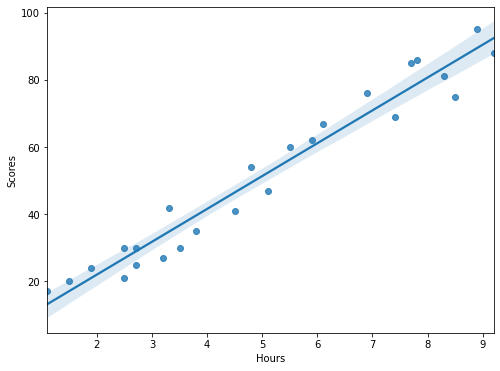

In [23]:
plt.figure(figsize=(8,6))
sns.regplot("Hours","Scores",data=df)

<b>Observation: </b> We can see a clear positive linear relationship between the number of hours studied by the student to the scores obtained in their test.

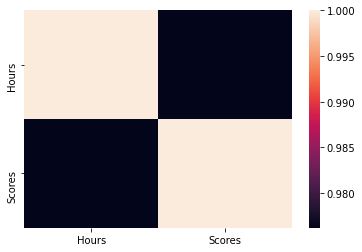

In [24]:
sns.heatmap(df.corr())

We can see a very high postive correlation between the two quantities.

We check to see if there are any  null values in the data and also check the data types of the various variables

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## 3. Making the model :
We will be using Linear Regression to create a predictive model for the data.

### First we will be creating a training and testing set for our data : 

We need to predict the scores of a student (dependent variable) keeping in mind the number of hours studied by that student (independent variable)

In [26]:
X = df[["Hours"]].values
Y = df[["Scores"]].values

In [27]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


### Creating and training the model:

In [28]:
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X_train,y_train)
yhat = lm.predict(X_test)
r2_score(y_test,yhat)

0.9454906892105356

For linear regression we try to express the dependent variable as a linear combination of the independent variables. <br>
here we have only 2 variables X and Y, so we try to express Y as : <br>
<b>Y = m*X + c </b><br>
Where m is the slope (coefficient of X) and c is the intercept

In [29]:
print("The coefficient is : ",lm.coef_)
print("The intercept is : ",lm.intercept_)

The coefficient is :  [[9.91065648]]
The intercept is :  [2.01816004]


### Plotting our regression line along with our data 

Text(0.5, 1.0, 'Hours vs Scores')

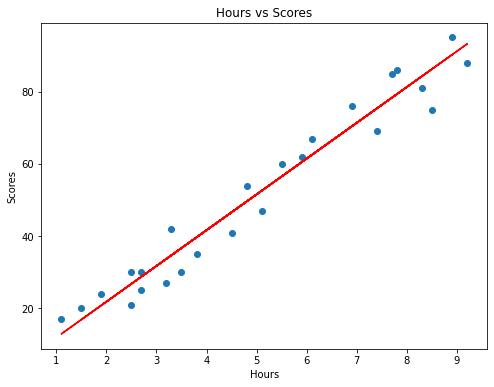

In [30]:
coef = lm.coef_[0][0]
inter = lm.intercept_[0]
plt.figure(figsize=(8,6))
plt.scatter("Hours","Scores",data=df)
plt.plot(X,coef*X + inter,c="r")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours vs Scores")

## 4. Evaluating the model : 

In [31]:
score = float(r2_score(y_test,yhat))
print("Our Accuracy is : ",score*100, "%")

Our Accuracy is :  94.54906892105356 %


In [32]:
y_test = y_test.reshape(1,5)
yhat = yhat.reshape(1,5)
pred = pd.DataFrame()
pred["Actual Values"] = y_test[0]
pred["Predicted Values"] = yhat[0]
pred

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


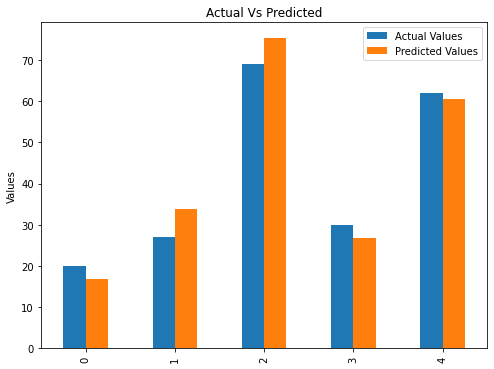

In [33]:
pred.plot(kind='bar',figsize=(8,6))
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual Vs Predicted")
plt.ylabel("Values")
plt.show()

## 5. Making predictions : 
We were asked the question of how much a student is going to score based on their study hours and were provided with an input of 9.25 hours in a day.<br>
We use our model to make this prediction: 

In [34]:
marks = lm.predict([[9.25]])
print("The percentage predicted is : ",round(marks[0][0],2),"% ")

The percentage predicted is :  93.69 % 


## Conclusion :
- We were able to apply the Linear Regression Algorithm to this simple data set. <br>
- The accuracy of our model on the training set was 94.54%<br>
- We were able to make predictions using our model